In [1]:
import numpy as np
import punct_utils as utils
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import quad

In [2]:
mu = 3
u = 0
f = lambda L, t: 1/((mu**2+1)*utils.nu(L, u)-utils.nu(L, t))

In [3]:
N_c = 6
L_n_r = np.arange(1, N_c+1)/(N_c+1)
n_r = np.arange(500, 2000, 100)
L_r = np.zeros((N_c, n_r.shape[0]), dtype=int)

eps_n = np.zeros((2, N_c, n_r.shape[0]))
err_quad = np.zeros((2, N_c, n_r.shape[0]))

for i, L_n in enumerate(tqdm(L_n_r)):
    L_r[i] = (n_r*L_n).astype(int)
    for j, (n, L) in enumerate(zip(n_r, L_r[i])):
        t_ech = 2*np.arange(n)*np.pi/n
        # Spike position
        val_ech = np.mean(f(L, t_ech)*utils.nu(L, t_ech))
        val_quad, err_quad[0, i, j] = quad(lambda t: f(L, t)*utils.nu(L, t)/(2*np.pi), -np.pi, np.pi, limit=1000)
        eps_n[0, i, j] = val_ech-val_quad
        # Phase transition
        val_ech = np.mean((f(L, t_ech)*utils.nu(L, t_ech))**2)
        val_quad, err_quad[1, i, j] = quad(lambda t: (f(L, t)*utils.nu(L, t))**2/(2*np.pi), -np.pi, np.pi, limit=1000)
        eps_n[1, i, j] = val_ech-val_quad

100%|██████████| 6/6 [03:24<00:00, 34.02s/it]


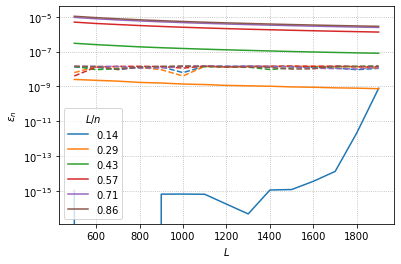

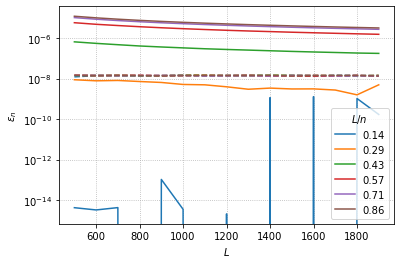

In [4]:
for i in range(N_c):
    color = 'C'+str(i)
    plt.plot(n_r, eps_n[0, i], color=color, label=np.round(L_n_r[i], 2))
    plt.plot(n_r, err_quad[0, i], color=color, ls='--')
plt.grid(ls=':')
plt.yscale('log')
plt.xlabel("$L$")
plt.ylabel("$\\epsilon_n$")
plt.legend(title="$L / n$")
plt.show()

for i in range(N_c):
    color = 'C'+str(i)
    plt.plot(n_r, eps_n[1, i], color=color, label=np.round(L_n_r[i], 2))
    plt.plot(n_r, err_quad[1, i], color=color, ls='--')
plt.grid(ls=':')
plt.yscale('log')
plt.xlabel("$L$")
plt.ylabel("$\\epsilon_n$")
plt.legend(title="$L / n$")
plt.show()